## Importing the packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# NLP packages
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

# Modeling packages
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

## Reading the Dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\Ammu\Desktop\Customer_Reviews (1).csv")
dataset.head()

,ProductID,UserID,Profile_Name,Helpful_Votes,Total_Votes,Rating,Headline,Review
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,3,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
dataset.isnull().sum()

ProductID        0
UserID           0
Profile_Name     0
Helpful_Votes    0
Total_Votes      0
Rating           0
Headline         0
Review           0
dtype: int64

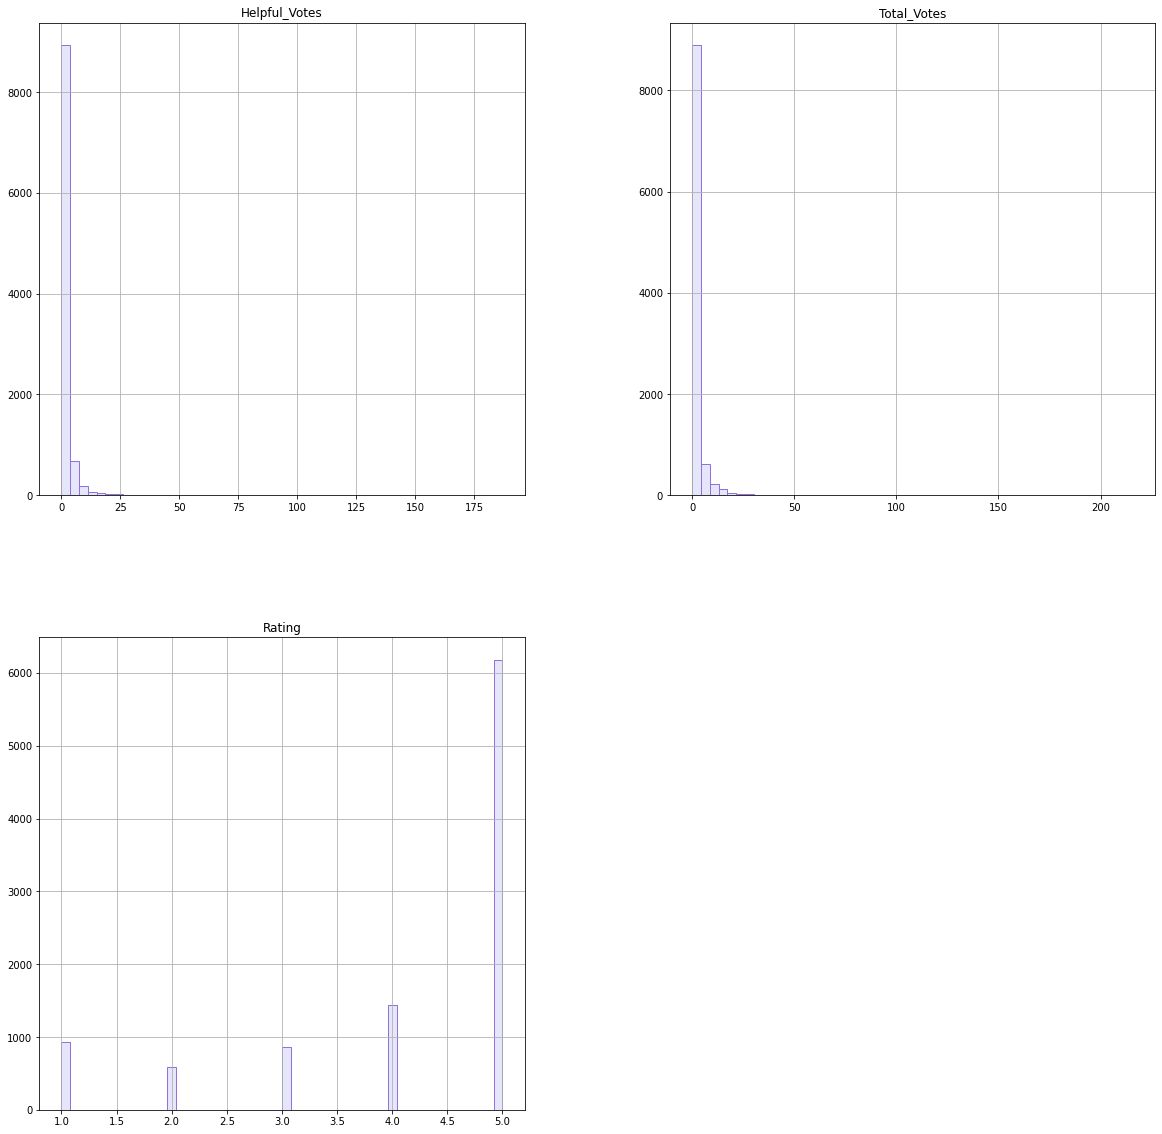

In [39]:
dataset.hist(bins=50, figsize=(20,20),edgecolor="mediumpurple", color="lavender")
plt.show()

In [5]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

# Mapping the ratings
dataset['Rating_Sentiment'] = dataset['Rating'].apply(sentiments)
dataset['Rating_Sentiment'].value_counts()

Positive    7615
Negative    1522
Neutral      863
Name: Rating_Sentiment, dtype: int64

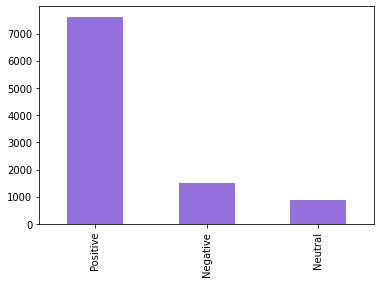

In [6]:
dataset.Rating_Sentiment.value_counts().plot.bar(color="mediumpurple")
plt.show()

In [7]:
z=pd.DataFrame(dataset['Rating_Sentiment'])
z

,Rating_Sentiment
0,Neutral
1,Negative
2,Positive
3,Negative
4,Positive
...,...
9995,Negative
9996,Positive
9997,Positive
9998,Positive


<AxesSubplot:ylabel='Rating_Sentiment'>

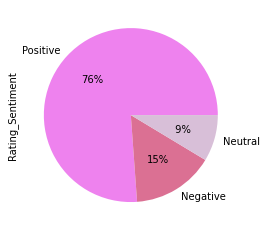

In [8]:
z.Rating_Sentiment.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["violet", "palevioletred", "thistle"])

In [9]:
dataset['text_review'] = dataset['Review'].str.lower()
dataset['text_review']

0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price.  there was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say, the organic formula ...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old... he had gas and constip...
Name: text_review, Length: 10000, dtype: object

In [10]:
special_characters = dataset['text_review'].apply(lambda review: 
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])
special_characters

0                                               [., ., .]
1                                   [., ., ., ., ", ", .]
2       [., ,, -, ., ., ., ,, ., ., ., ., ', ", ,, ,, ...
3                                         [., (, ), ., .]
4                                         [., ., ., ,, .]
                              ...                        
9995                                            [., ., .]
9996    [,, ., ,, (, -, ), ., ', ., ', ,, ,, ., <, /, ...
9997    [., ., ., ., ., ., ., ,, ., ., ,, ,, (, ), ., ...
9998                                                  [.]
9999    [., ., ., ., ., ., ', ,, ., <, /, >, ., ,, ., ...
Name: text_review, Length: 10000, dtype: object

In [11]:
text_review_list = [item for sublist in special_characters for item in sublist]
set(text_review_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '¢',
 '§',
 '®'}

In [12]:
dataset_backupreview = dataset['text_review'].copy()
dataset['text_review'] = dataset['text_review'].str.replace(r'[^A-Za-z0-9 ]+', ' ')
dataset['text_review']

C:\Users\Ammu\AppData\Local\Temp/ipykernel_30524/3772835882.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['text_review'] = dataset['text_review'].str.replace(r'[^A-Za-z0-9 ]+', ' ')


0       i have bought several of the vitality canned d...
1       product arrived labeled as jumbo salted peanut...
2       this is a confection that has been around a fe...
3       if you are looking for the secret ingredient i...
4       great taffy at a great price   there was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    like the bad reviews say  the organic formula ...
9997    i wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    we have a 7 week old  he had gas and constipat...
Name: text_review, Length: 10000, dtype: object

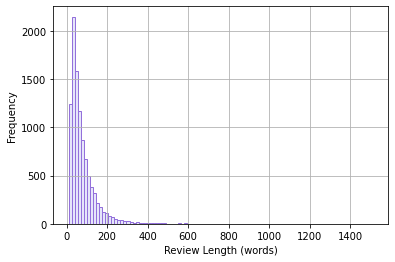

In [13]:
words_per_review = dataset.Review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100,edgecolor="mediumpurple", color="lavender")
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [14]:
Noise = []
English_StopWords = stopwords.words('english')
print('\n--stopwords in the english --\n',English_StopWords)


--stopwords in the english --
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only'

In [15]:
StopWords = set(English_StopWords)
NonStopWords = []
stopword = []
sentence = dataset['text_review'][0]
words = nltk.word_tokenize(sentence)
for word in words:
    if word not in StopWords:
        NonStopWords.append(word)
print('\n-- Non-stopwords in the sentence --\n', NonStopWords)


-- Non-stopwords in the sentence --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [16]:
def stopwords_removal(StopWords, sentence):
    return ' '.join([word for word in nltk.word_tokenize(sentence) if word not in StopWords])

dataset['NonstopReview'] = dataset['text_review'].apply(lambda row: stopwords_removal(StopWords, row))

In [17]:
print(dataset['NonstopReview'])

0       bought several vitality canned dog food produc...
1       product arrived labeled jumbo salted peanuts p...
2       confection around centuries light pillowy citr...
3       looking secret ingredient robitussin believe f...
4       great taffy great price wide assortment yummy ...
                              ...                        
9995    switched advance similac organic product think...
9996    like bad reviews say organic formula constipat...
9997    wanted solely breastfeed unable keep supplemen...
9998    love fact get delieved house delievy charge ha...
9999    7 week old gas constipation problems first 5 w...
Name: NonstopReview, Length: 10000, dtype: object


In [18]:
token_lists = [word_tokenize(each) for each in dataset['NonstopReview']]
tokens = [item for sublist in token_lists for item in sublist]
print("Present unique tokens: ",len(set(tokens)))

Present unique tokens:  18668


In [19]:
X_TrainingData, X_TestingData,Y_TrainingData, Y_TestingData = train_test_split(dataset['NonstopReview'], dataset['Rating_Sentiment'], test_size=0.2, random_state = 45)
X_TrainingData, X_TestingData,Y_TrainingData, Y_TestingData

(4643    sampling many sugar free chocolates find one o...
 2390    nice strong flavor bitterness br br strong wou...
 6162    bought two types edible glitter decorate plain...
 8678    coffee funny taste good would think wolfgang w...
 6944    seems soda good kid people pointed might high ...
                               ...                        
 8772    agar basically gelatin vegans vegetarians regu...
 163     found much tastier plain tuna pouches excellen...
 6012    take every day used take fish oil made change ...
 6558    four year old chinese crested mix loves dog tr...
 7115    cups simple easy use drawback fact maybe 1 3 c...
 Name: NonstopReview, Length: 8000, dtype: object,
 4132    never really intended use professional setting...
 6553    tea strong might well waste time brewing chew ...
 7604    earthborn best grain free dog food reasonably ...
 585     saw spicy thai chips knew try love spicy love ...
 5924    perfect great vintage looking lollipops vintag...
     

In [20]:
class Layer:
    def __init__(self):
        self.Inputdata = None
        self.Outputdata = None

    def forward_propagation(self, input):
        raise NotImplementedError
    def backward_propagation(self, Outputdata_error, learning_rate):
        raise NotImplementedError

In [21]:
class MLLayer(Layer):
    
    def __init__(self, Inputdata_size, Outputdata_size):
        self.weights = np.random.rand(Inputdata_size, Outputdata_size) - 0.5
        self.bias = np.random.rand(1, Outputdata_size) - 0.5

    def forward_propagation(self, input_data):
        self.Inputdata = input_data
        self.Outputdata = np.dot(self.Inputdata, self.weights) + self.bias
        return self.Outputdata

    def backward_propagation(self, Outputdata_error, learning_rate):
        
        Inputdata_error = np.dot(Outputdata_error, self.weights.T)
        weights_error = np.dot(self.Inputdata.T, Outputdata_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * Outputdata_error
        return Inputdata_error

In [22]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.Inputdata = input_data
        self.Outputdata = self.activation(self.Inputdata)
        return self.Outputdata

    def backward_propagation(self, Outputdata_error, learning_rate):
        return self.activation_prime(self.Inputdata) * Outputdata_error

In [23]:
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

In [24]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [40]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
    def add(self, layer):
        self.layers.append(layer)
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime
    def predict(self, input_data):
        samples = len(input_data)
        result = []
        for i in range(samples):
            Outputdata = input_data[i]
            for layer in self.layers:
                Outputdata = layer.forward_propagation(Outputdata)
            result.append(np.argmax(Outputdata,axis=1))
        return result
    def fit(self, x_TrainingData, y_TrainingData, epochs, learning_rate):
        samples = len(x_TrainingData)
        TrainingData_acc = []
        for i in range(epochs):
            err = 0
            for j in range(samples):
                Outputdata = x_TrainingData[j]
                for layer in self.layers:
                    Outputdata = layer.forward_propagation(Outputdata)
                err += self.loss(y_TrainingData[j], Outputdata)
                error = self.loss_prime(y_TrainingData[j], Outputdata)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
            print("Please Hold")
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))         

In [41]:
tokenizer=Tokenizer()
X_TrainingData_indices = tokenizer.texts_to_sequences(X_TrainingData)
X_TrainingData_indices = pad_sequences(X_TrainingData_indices, maxlen=50, padding='post')
X_TrainingData_indices1 = X_TrainingData_indices.reshape(X_TrainingData.shape[0], 1, 50)
X_TrainingData_indices1 = X_TrainingData_indices1.astype('float64')

print(X_TrainingData_indices1)

X_TestingData_indices = tokenizer.texts_to_sequences(X_TestingData)
X_TestingData_indices = pad_sequences(X_TestingData_indices, maxlen=50, padding='post')
X_TestingData_indices1 = X_TestingData_indices.reshape(X_TestingData.shape[0], 1, 50)

[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]


In [42]:
le = LabelEncoder()
Y_TrainingData_indices = le.fit_transform(Y_TrainingData.values)
Y_TestingData_indices = le.transform(Y_TestingData.values)

In [43]:
TrainingData_accuracy = []
TestingData_accuracy = []

net = Network()
net.add(MLLayer(50, 30))                
net.add(ActivationLayer(tanh, tanh_prime))
net.add(MLLayer(30, 10))                  
net.add(ActivationLayer(tanh, tanh_prime))
net.add(MLLayer(10, 3))                    
net.add(ActivationLayer(tanh, tanh_prime))
net.use(mse, mse_prime)
net.fit(X_TrainingData_indices1, Y_TrainingData_indices, epochs=300, learning_rate=0.01)

Please Hold
epoch 1/300   error=0.917604
Please Hold
epoch 2/300   error=0.914352
Please Hold
epoch 3/300   error=0.914256
Please Hold
epoch 4/300   error=0.914217
Please Hold
epoch 5/300   error=0.914196
Please Hold
epoch 6/300   error=0.914183
Please Hold
epoch 7/300   error=0.914174
Please Hold
epoch 8/300   error=0.914167
Please Hold
epoch 9/300   error=0.914162
Please Hold
epoch 10/300   error=0.914158
Please Hold
epoch 11/300   error=0.914155
Please Hold
epoch 12/300   error=0.914152
Please Hold
epoch 13/300   error=0.914150
Please Hold
epoch 14/300   error=0.914148
Please Hold
epoch 15/300   error=0.914146
Please Hold
epoch 16/300   error=0.914145
Please Hold
epoch 17/300   error=0.914144
Please Hold
epoch 18/300   error=0.914143
Please Hold
epoch 19/300   error=0.914142
Please Hold
epoch 20/300   error=0.914141
Please Hold
epoch 21/300   error=0.914140
Please Hold
epoch 22/300   error=0.914139
Please Hold
epoch 23/300   error=0.914139
Please Hold
epoch 24/300   error=0.914138
P

Please Hold
epoch 195/300   error=0.914127
Please Hold
epoch 196/300   error=0.914127
Please Hold
epoch 197/300   error=0.914127
Please Hold
epoch 198/300   error=0.914127
Please Hold
epoch 199/300   error=0.914126
Please Hold
epoch 200/300   error=0.914126
Please Hold
epoch 201/300   error=0.914126
Please Hold
epoch 202/300   error=0.914126
Please Hold
epoch 203/300   error=0.914126
Please Hold
epoch 204/300   error=0.914126
Please Hold
epoch 205/300   error=0.914126
Please Hold
epoch 206/300   error=0.914126
Please Hold
epoch 207/300   error=0.914126
Please Hold
epoch 208/300   error=0.914126
Please Hold
epoch 209/300   error=0.914126
Please Hold
epoch 210/300   error=0.914126
Please Hold
epoch 211/300   error=0.914126
Please Hold
epoch 212/300   error=0.914126
Please Hold
epoch 213/300   error=0.914126
Please Hold
epoch 214/300   error=0.914126
Please Hold
epoch 215/300   error=0.914126
Please Hold
epoch 216/300   error=0.914126
Please Hold
epoch 217/300   error=0.914126
Please Hold

In [44]:
preds = net.predict(X_TestingData_indices1)

In [45]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(preds, Y_TestingData_indices)
print(confusion_matrix)

[[   0    0    0]
 [   0    0    0]
 [ 290  176 1534]]


In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(preds, Y_TestingData_indices))
print('Accuracy: {}'. format(accuracy_score(preds, Y_TestingData_indices)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.77      0.87      2000

    accuracy                           0.77      2000
   macro avg       0.33      0.26      0.29      2000
weighted avg       1.00      0.77      0.87      2000

Accuracy: 0.767


c:\users\ammu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ammu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ammu\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu